<a href="https://colab.research.google.com/github/CristianoDataScience/Analise-Estat-stica-Enem_2019/blob/main/Analise_Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analise Estaística 

In [ ]:
!pip install xlrd>=1.2.0

### Importando Bibliotecas 
___

* Pandas
* Numpy
* Seaborn
* Matplot
* Plotly
* Sklearn 
* Keras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Importando base de dados

## Informações 

### Glossário do conjunto de dados (colunas)
* BHK : Número de quartos, hall, cozinha.
* Aluguel : Aluguel das Casas/Apartamentos/Apartamentos.
* Tamanho : Tamanho das casas/apartamentos/apartamentos em pés quadrados.
* Andar : Casas/Apartamentos/Apartamentos situados em que Andar e Número Total  de Andares (Exemplo: Térreo de 2, 3 de 5, etc.)
* Tipo de área : Tamanho das casas/apartamentos/apartamentos calculados na superárea ou área de carpete ou área de construção.
* Localidade da Área : Localidade das Casas/Apartamentos/Apartamentos.
* Cidade : Cidade onde estão localizadas as casas/apartamentos/apartamentos.
* Status de Mobília: Situação de Mobília das Casas/Apartamentos/Apartamentos, seja Mobiliado, Semi-Mobiliado ou Sem Mobília.
* Inquilino Preferido : Tipo de Inquilino Preferido pelo Proprietário ou Agente.
Banheiro : Número de Banheiros.
* Ponto de Contato : Quem você deve contatar para obter mais informações sobre as Casas/Apartamentos/Apartamentos.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/analise_dados/Data_Casas_Aluguel.csv', sep = ',')
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
# verificando tipo de colunas 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


(Skewness): 21.41, (Kurtosis): 841.108


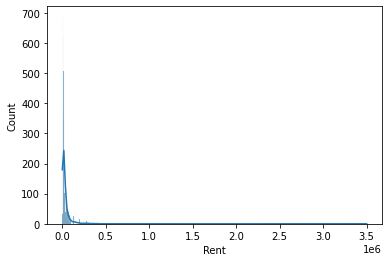

In [ ]:
skewness = round(df['Rent'].skew(), 3)
kurtosis = round(df['Rent'].kurt(), 3)
print(f"(Skewness): {skewness}, (Kurtosis): {kurtosis}")

sns.histplot(df['Rent'], kde=True)
plt.show()

### "Mês" tem três partes, eu quero dividi-lo.

In [ ]:
Date = df['Posted On'].str.split(pat = '-',n=2,expand =True)
Date.columns = ['a','b','c']
Date = Date.rename(columns ={'a':'Year',"b":'Month','c':'Day'})

#All of year is 2022,we don't need this characteristic
Date['Year'].value_counts()
#This characteristic is about April~July
Date['Month'].value_counts()
#Day has no regular ,so drop it
Date['Day'].value_counts()

#Replace 'Posted On with 'Month'
df = pd.concat([df,Date['Month']],axis = 1)
z  = df.drop('Posted On',axis= 1)

df_copy = z.copy()

In [ ]:
df_copy

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,05
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,05
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,05
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,07
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,05
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,05
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,05
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,07
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent,07


(Skewness): 0.909, (Kurtosis): 0.877


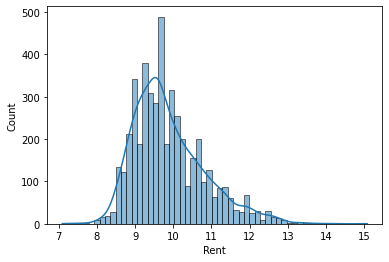

In [ ]:
#Devido à alta assimetria positiva de 'Rent', use log1p para alcançar a distribuição normal.
df_copy['Rent'] = np.log1p(df['Rent'])

# skewness & kurtosis
skewness = round(df_copy['Rent'].skew(), 3)
kurtosis = round(df_copy['Rent'].kurt(), 3)
print(f"(Skewness): {skewness}, (Kurtosis): {kurtosis}")

sns.histplot(df_copy['Rent'], kde=True)
plt.show()